In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
os.chdir('../../')

In [4]:
from musicautobot.numpy_encode import *
from musicautobot.config import *
from musicautobot.music_transformer import *

## MusicTransformer Training

MusicTransformer takes the basic idea of [Language Models](https://en.wikipedia.org/wiki/Language_model) and applies it to Music.  

Given a sequence of notes, predict the next most likely set of notes.

This model is based off of [transformer-XL](https://arxiv.org/abs/1901.02860) and uses fast.ai's [implementation](https://github.com/fastai/fastai/blob/master/fastai/text/models/transformer.py) of it.

In [5]:
# Location of your midi filesfiles
midi_path = Path('data/midi/examples')
midi_path.mkdir(parents=True, exist_ok=True)

# Location to save dataset
data_path = Path('data/numpy')
data_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save.pkl'

## 1. Gather midi dataset

Make sure all your midi data is in `musicautobot/data/midi` directory

Here's a pretty good dataset with lots of midi data:  
https://www.reddit.com/r/datasets/comments/3akhxy/the_largest_midi_collection_on_the_internet/

Download the folder and unzip it to `data/midi`

## 2. Create dataset from MIDI files

In [6]:
midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)

19

In [7]:
processors = [Midi2ItemProcessor()]
data = MusicDataBunch.from_files(midi_files, data_path, processors=processors, bs=2, bptt=12)
data.save(data_save_name)

/Users/caslabs/Documents/labs/APPLYAI/explore/musicautobot/musicautobot/numpy_encode.py:53: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flat.getElementsByClass('Note').highestTime, s.flat.getElementsByClass('Chord').highestTime)
/Users/caslabs/opt/anaconda3/envs/musicautobot/lib/python3.10/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [8]:
# Show Data
data.train_dl.on_epoch_begin()
x, y = data.one_batch();
x, y

(tensor([[[  0,   0],
          [  1,   0],
          [ 69,   0],
          [141,   0],
          [ 66,   0],
          [141,   0],
          [ 62,   0],
          [141,   0],
          [  8,   0],
          [141,   0],
          [ 69,   4],
          [141,   4]],
 
         [[ 75,  64],
          [141,  64],
          [ 66,  64],
          [153,  64],
          [ 63,  64],
          [153,  64],
          [ 59,  64],
          [153,  64],
          [  8,  64],
          [141,  64],
          [ 78,  68],
          [139,  68]]]),
 tensor([[[  1,   0],
          [ 69,   0],
          [141,   0],
          [ 66,   0],
          [141,   0],
          [ 62,   0],
          [141,   0],
          [  8,   0],
          [141,   0],
          [ 69,   4],
          [141,   4],
          [  8,   4]],
 
         [[141,  64],
          [ 66,  64],
          [153,  64],
          [ 63,  64],
          [153,  64],
          [ 59,  64],
          [153,  64],
          [  8,  64],
          [141,  64],
 

## 3. Load Model

In [9]:
batch_size = 1
encode_position = True
dl_tfms = [batch_position_tfm] if encode_position else []
data = load_data(data_path, data_save_name, bs=batch_size, encode_position=encode_position, dl_tfms=dl_tfms)

In [10]:
config = default_config()
config['encode_position'] = encode_position
learn = music_model_learner(data, config=config.copy())

## 4. Train

In [11]:
learn.fit_one_cycle(4)

In [12]:
learn.save('example')

PosixPath('data/numpy/models/example.pth')

## 5. Predict

---
See [Generate.ipynb](Generate.ipynb) to use a pretrained model and generate better predictions

---

In [13]:
midi_file = Path('data/midi/notebook_examples/single_bar_example.mid'); midi_file
item = MusicItem.from_file(midi_file, data.vocab);

/Users/caslabs/Documents/labs/APPLYAI/explore/musicautobot/musicautobot/numpy_encode.py:53: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flat.getElementsByClass('Note').highestTime, s.flat.getElementsByClass('Chord').highestTime)


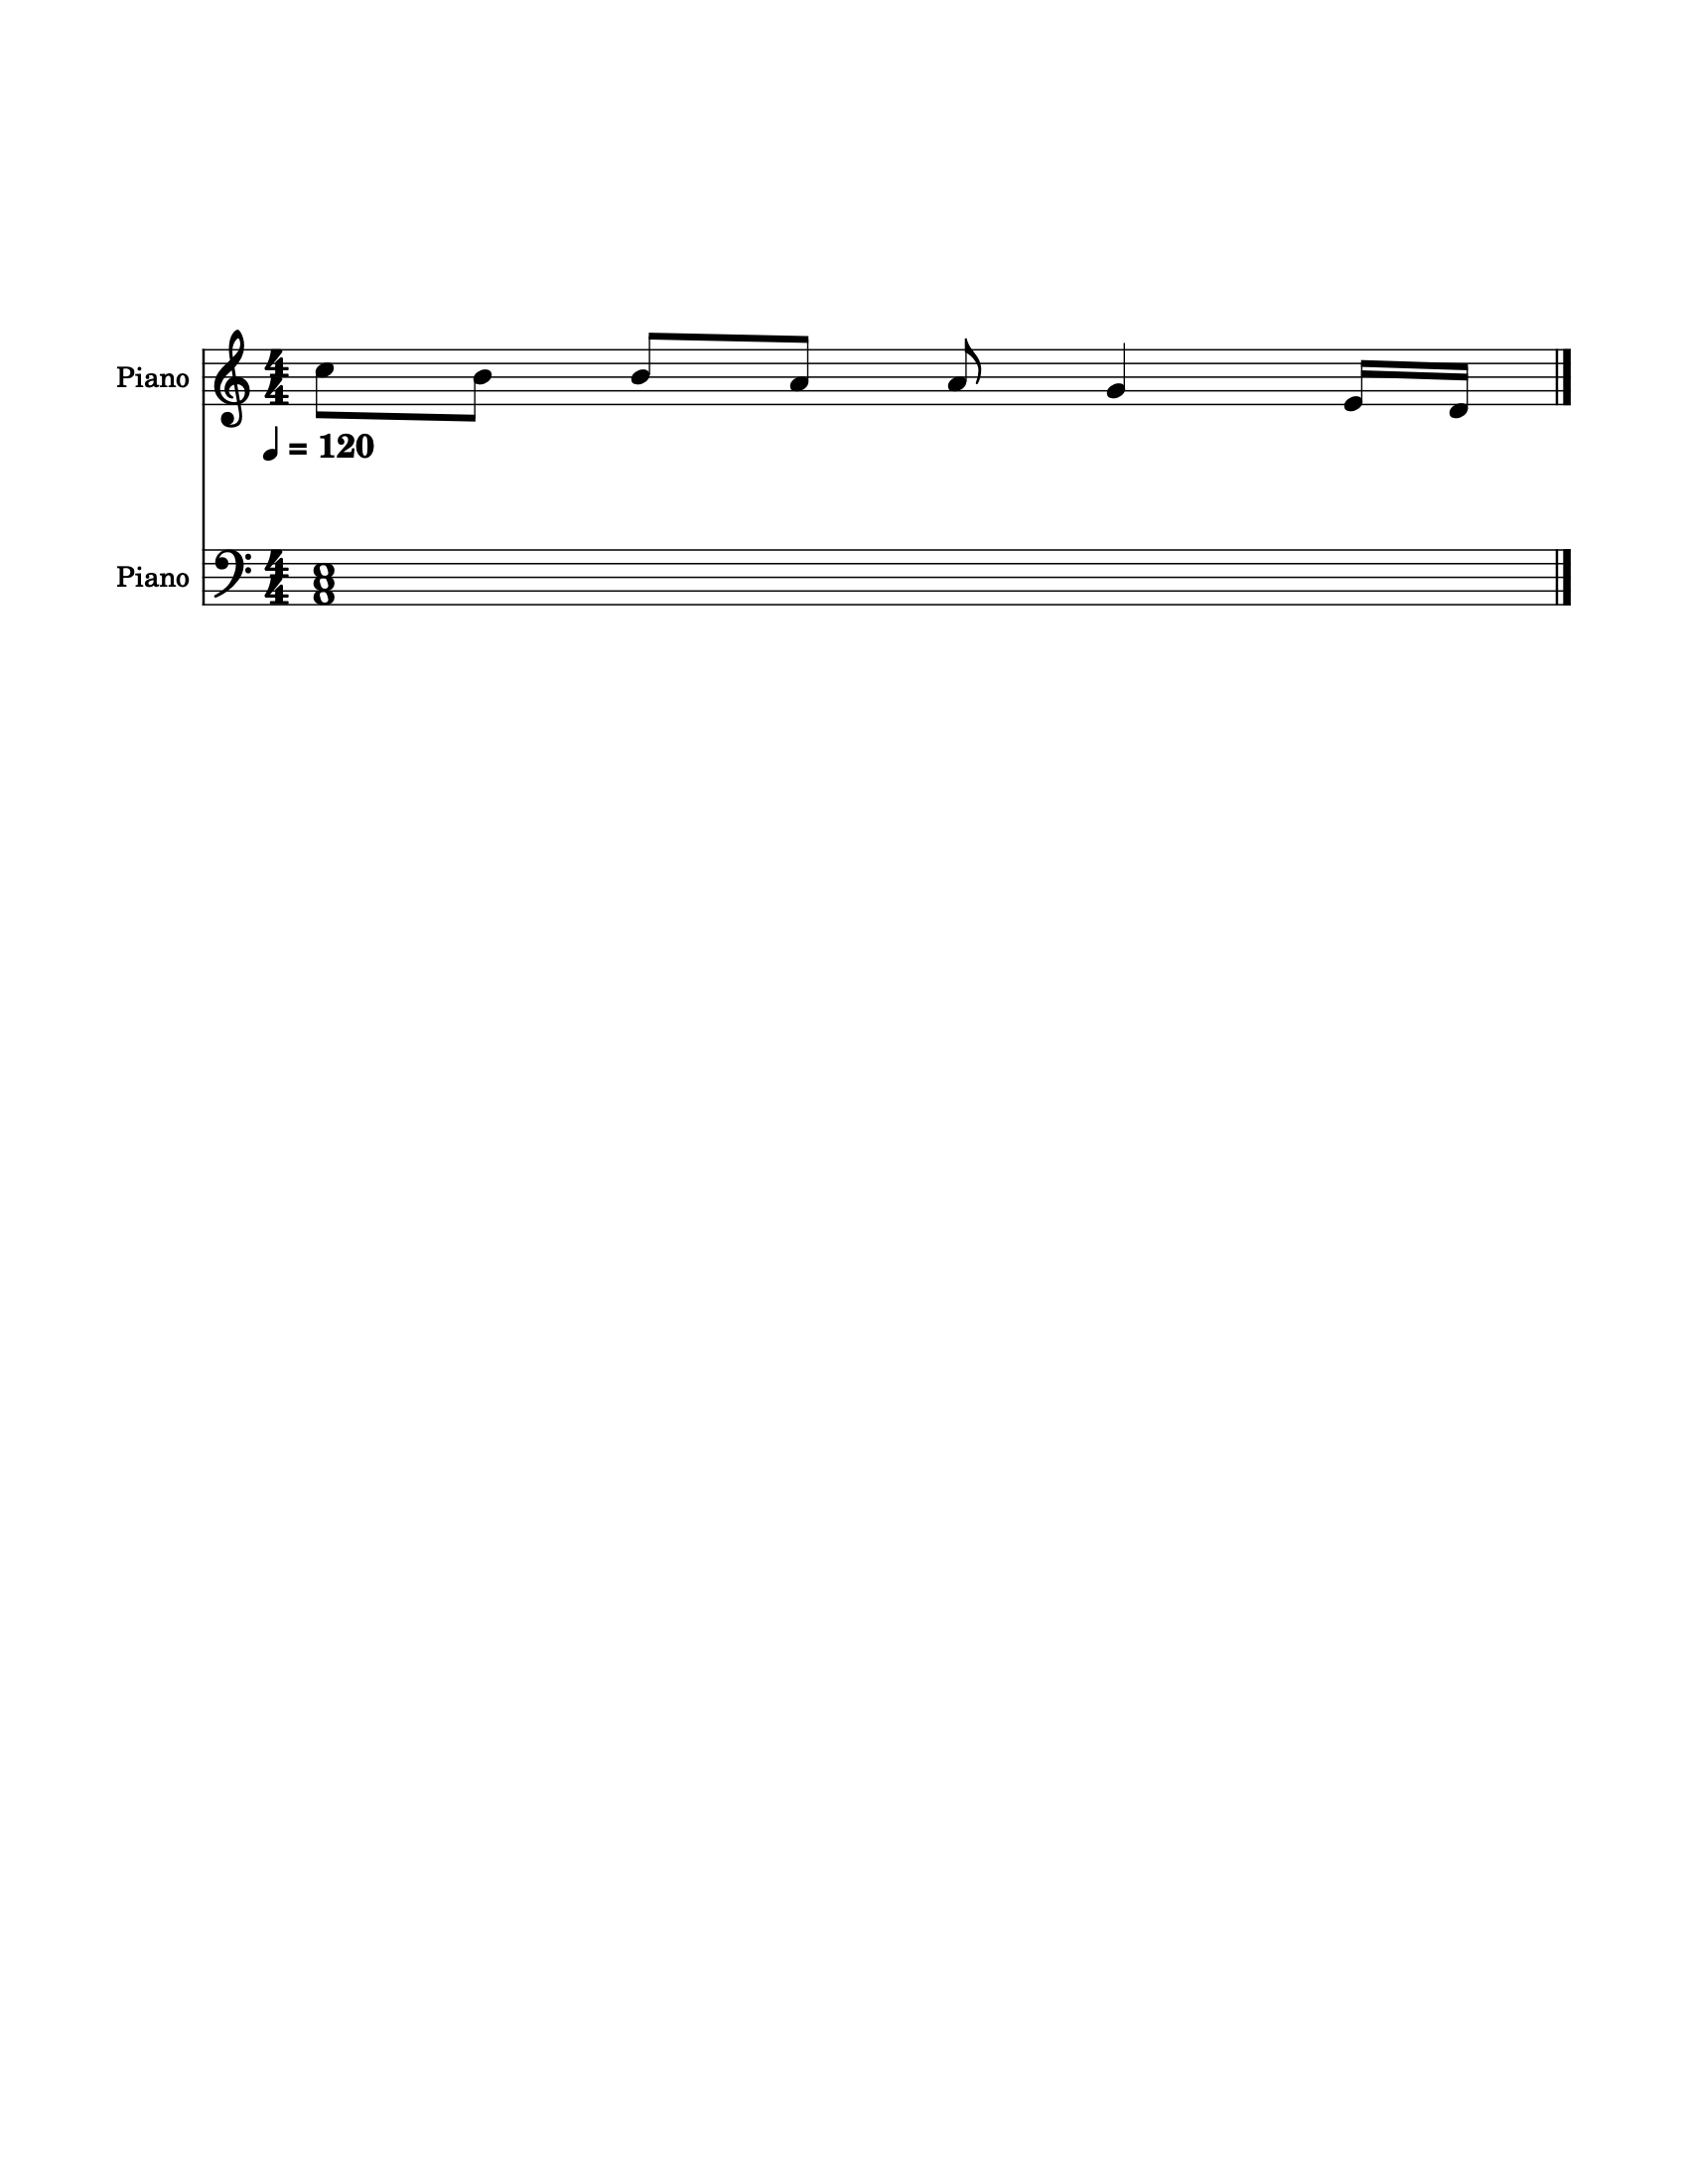

In [15]:
item.show()

Here's what the seed sounds like:

### Start Predictions:

In [16]:
pred, full = learn.predict(item, n_words=100)

Prediction

Non midi note detected. Only returning valid portion. Index, seed 1 (50, 2)


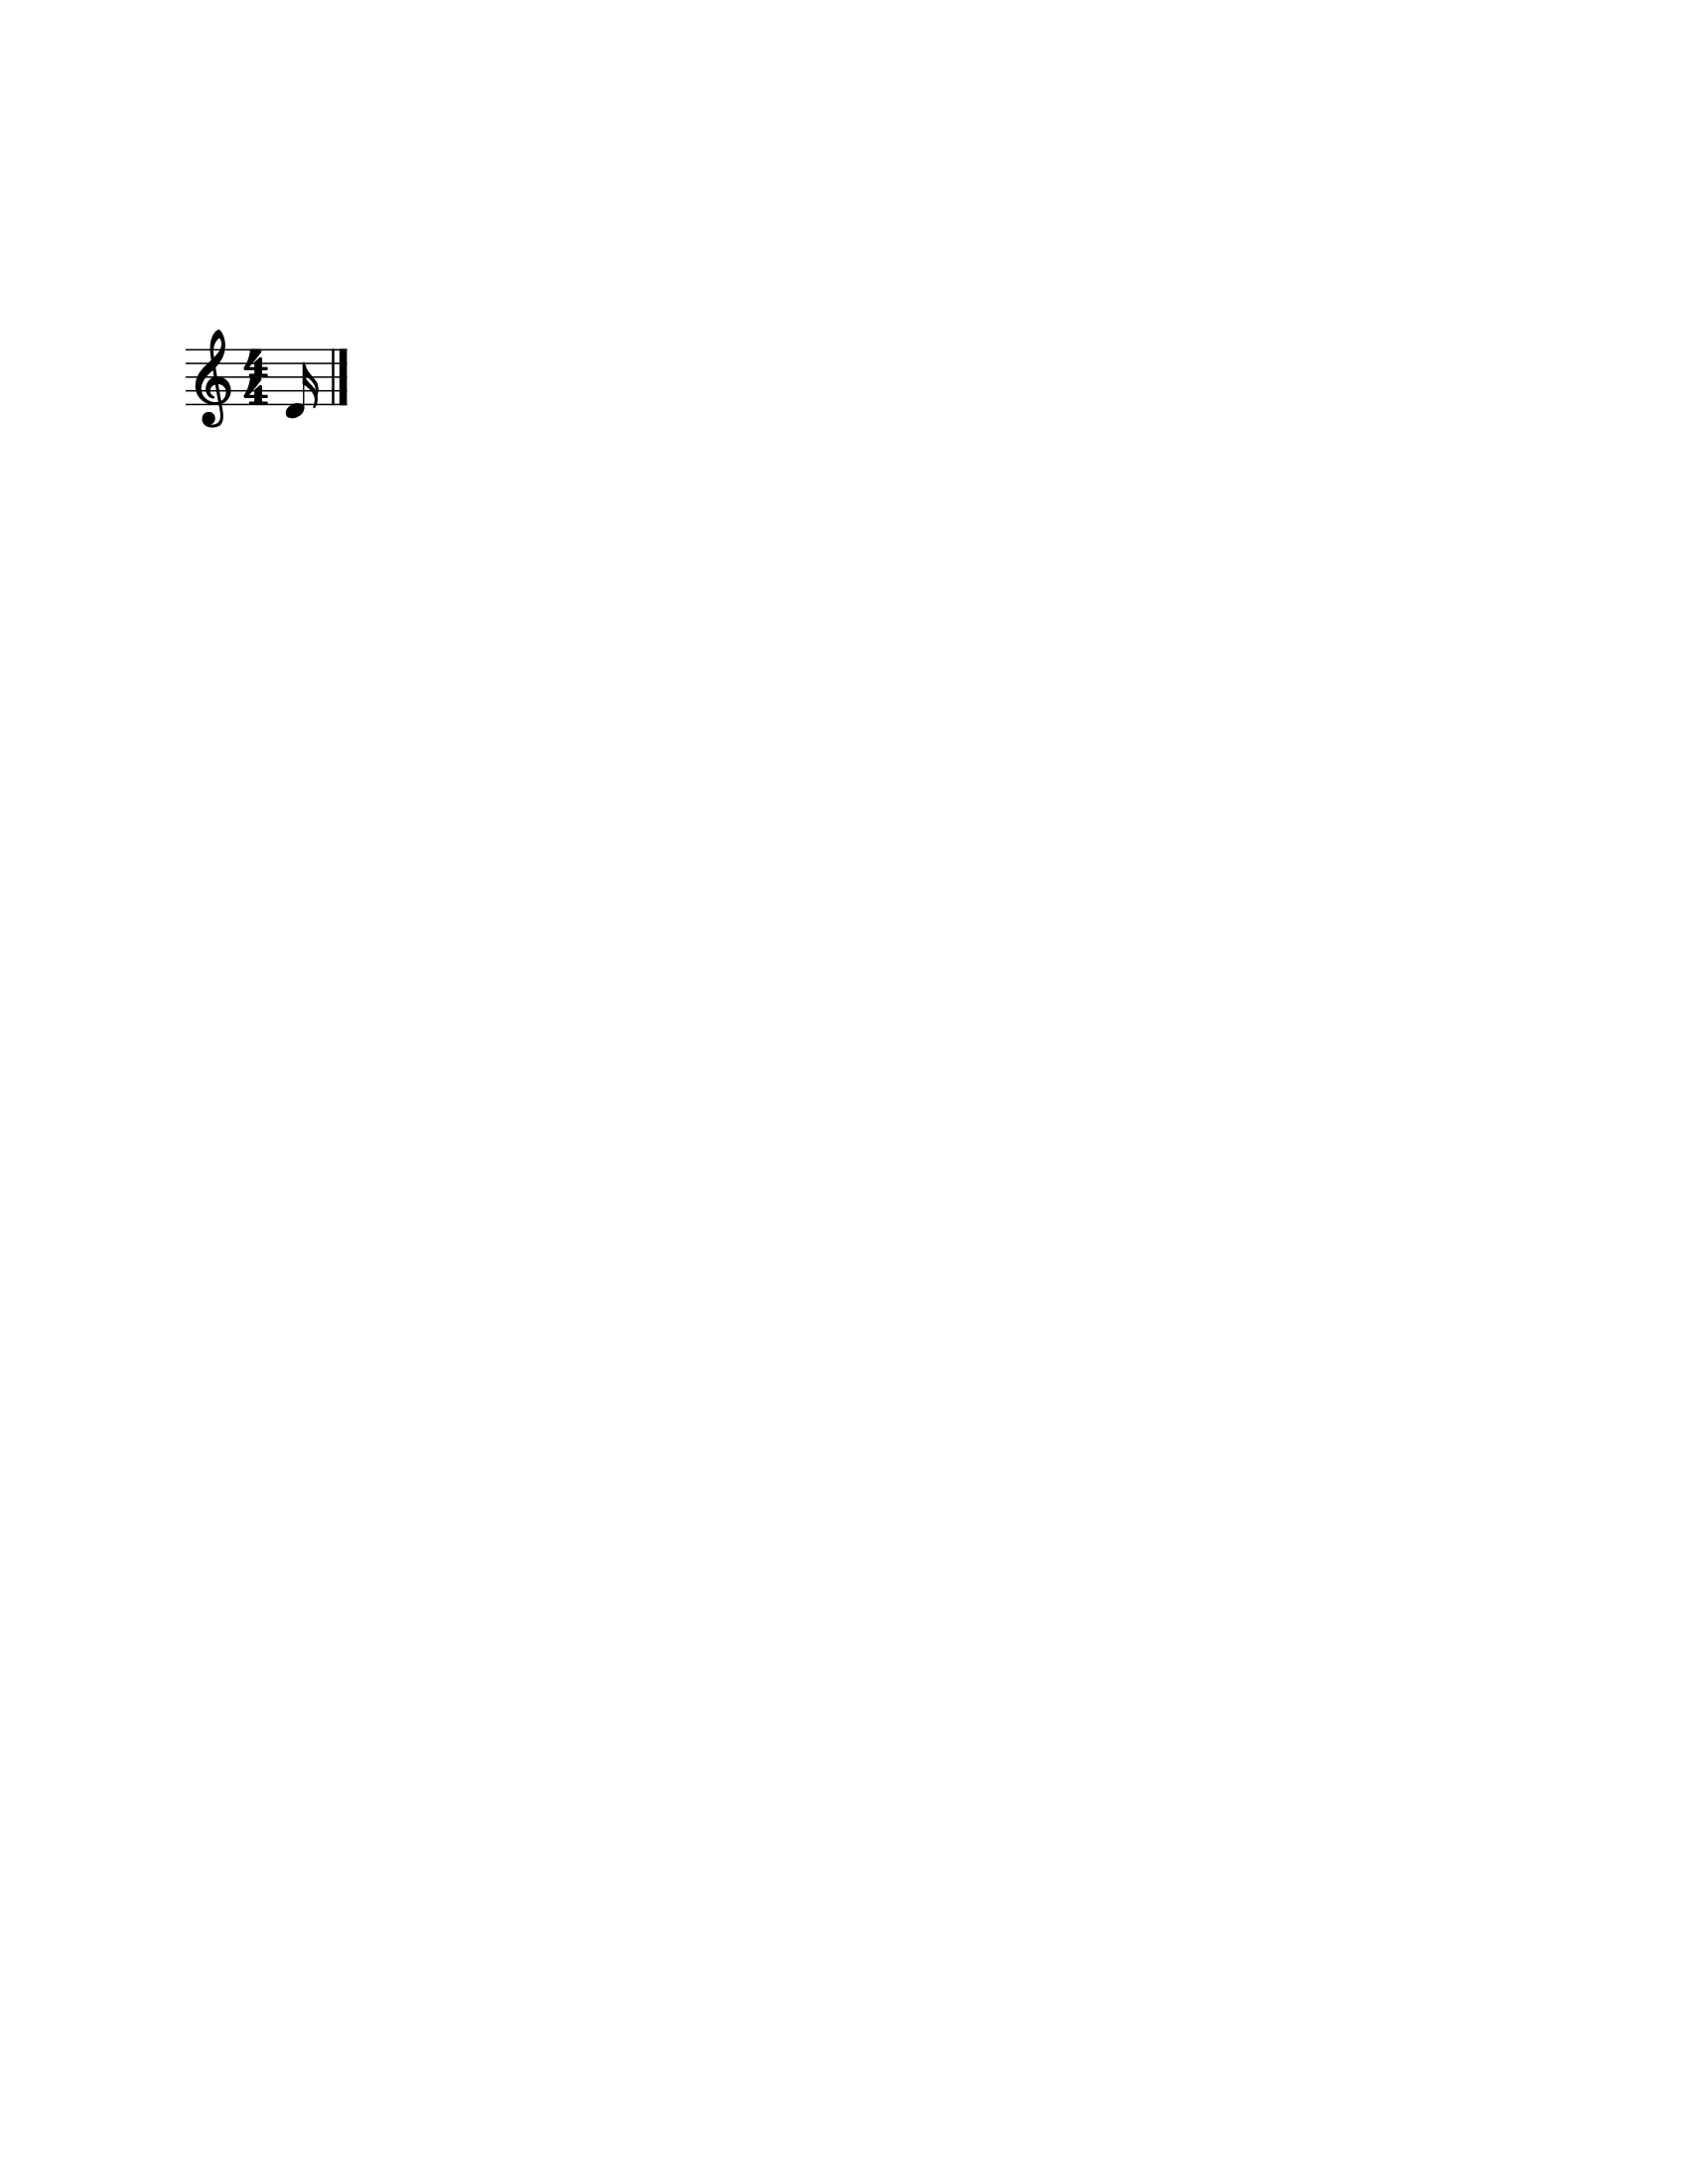

In [17]:
# Prediction
pred.show()

In [18]:
pred.play()